# House Price Prediction

In [88]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium.plugins import FastMarkerCluster

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings("ignore")

In [89]:
# Importing the dataset

data = pd.read_csv('home_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [90]:
#droping the unnecessary columns such as id, date

data.drop(['id','date','sqft_above','sqft_basement','sqft_living15','sqft_lot15','zipcode'],axis=1,inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1955,0,47.5112,-122.257
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,47.7210,-122.319
2,180000,2,1.00,770,10000,1.0,0,0,3,6,1933,0,47.7379,-122.233
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1965,0,47.5208,-122.393
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1987,0,47.6168,-122.045


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21613 non-null  int64  
 1   bedrooms      21613 non-null  int64  
 2   bathrooms     21613 non-null  float64
 3   sqft_living   21613 non-null  int64  
 4   sqft_lot      21613 non-null  int64  
 5   floors        21613 non-null  float64
 6   waterfront    21613 non-null  int64  
 7   view          21613 non-null  int64  
 8   condition     21613 non-null  int64  
 9   grade         21613 non-null  int64  
 10  yr_built      21613 non-null  int64  
 11  yr_renovated  21613 non-null  int64  
 12  lat           21613 non-null  float64
 13  long          21613 non-null  float64
dtypes: float64(4), int64(10)
memory usage: 2.3 MB


In [92]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1971.005136,84.402258,47.560053,-122.213896
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,29.373411,401.679240,0.138564,0.140828
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,47.777600,-121.315000


In [93]:
# checking for null values/missing values

data.isnull().sum()

price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
view            0
condition       0
grade           0
yr_built        0
yr_renovated    0
lat             0
long            0
dtype: int64

In [94]:
data.nunique()

price           4032
bedrooms          13
bathrooms         30
sqft_living     1038
sqft_lot        9782
floors             6
waterfront         2
view               5
condition          5
grade             12
yr_built         116
yr_renovated      70
lat             5034
long             752
dtype: int64

# Data Preprocessing

In [95]:
# changing float to integer

data['bathrooms'] = data['bathrooms'].astype(int)
data['floors'] = data['floors'].astype(int)

# renaming the column yr_built to age and changing the values to age

data.rename(columns={'yr_built':'age'},inplace=True)
data['age'] = 2023 - data['age']
# print(data["age"])

# changing the column yr_renovated to renovated and changing the values to 0 and 1

data.rename(columns={'yr_renovated':'renovated'},inplace=True)
data['renovated'] = data['renovated'].apply(lambda x: 0 if x == 0 else 1)
# print(data["renovated"])
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,age,renovated,lat,long
0,221900,3,1,1180,5650,1,0,0,3,7,68,0,47.5112,-122.257
1,538000,3,2,2570,7242,2,0,0,3,7,72,1,47.7210,-122.319
2,180000,2,1,770,10000,1,0,0,3,6,90,0,47.7379,-122.233
3,604000,4,3,1960,5000,1,0,0,5,7,58,0,47.5208,-122.393
4,510000,3,2,1680,8080,1,0,0,3,8,36,0,47.6168,-122.045


# Exploratory Data Analysis

### Correlation Matrix to find the relationship between the variables

In [96]:
# using correlation statistical method to find the relation between the price and other features

data.corr()['price'].sort_values(ascending=False)

price          1.000000
sqft_living    0.702035
grade          0.667434
bathrooms      0.510072
view           0.397293
bedrooms       0.308350
lat            0.307003
waterfront     0.266369
floors         0.237211
renovated      0.126092
sqft_lot       0.089661
condition      0.036362
long           0.021626
age           -0.054012
Name: price, dtype: float64

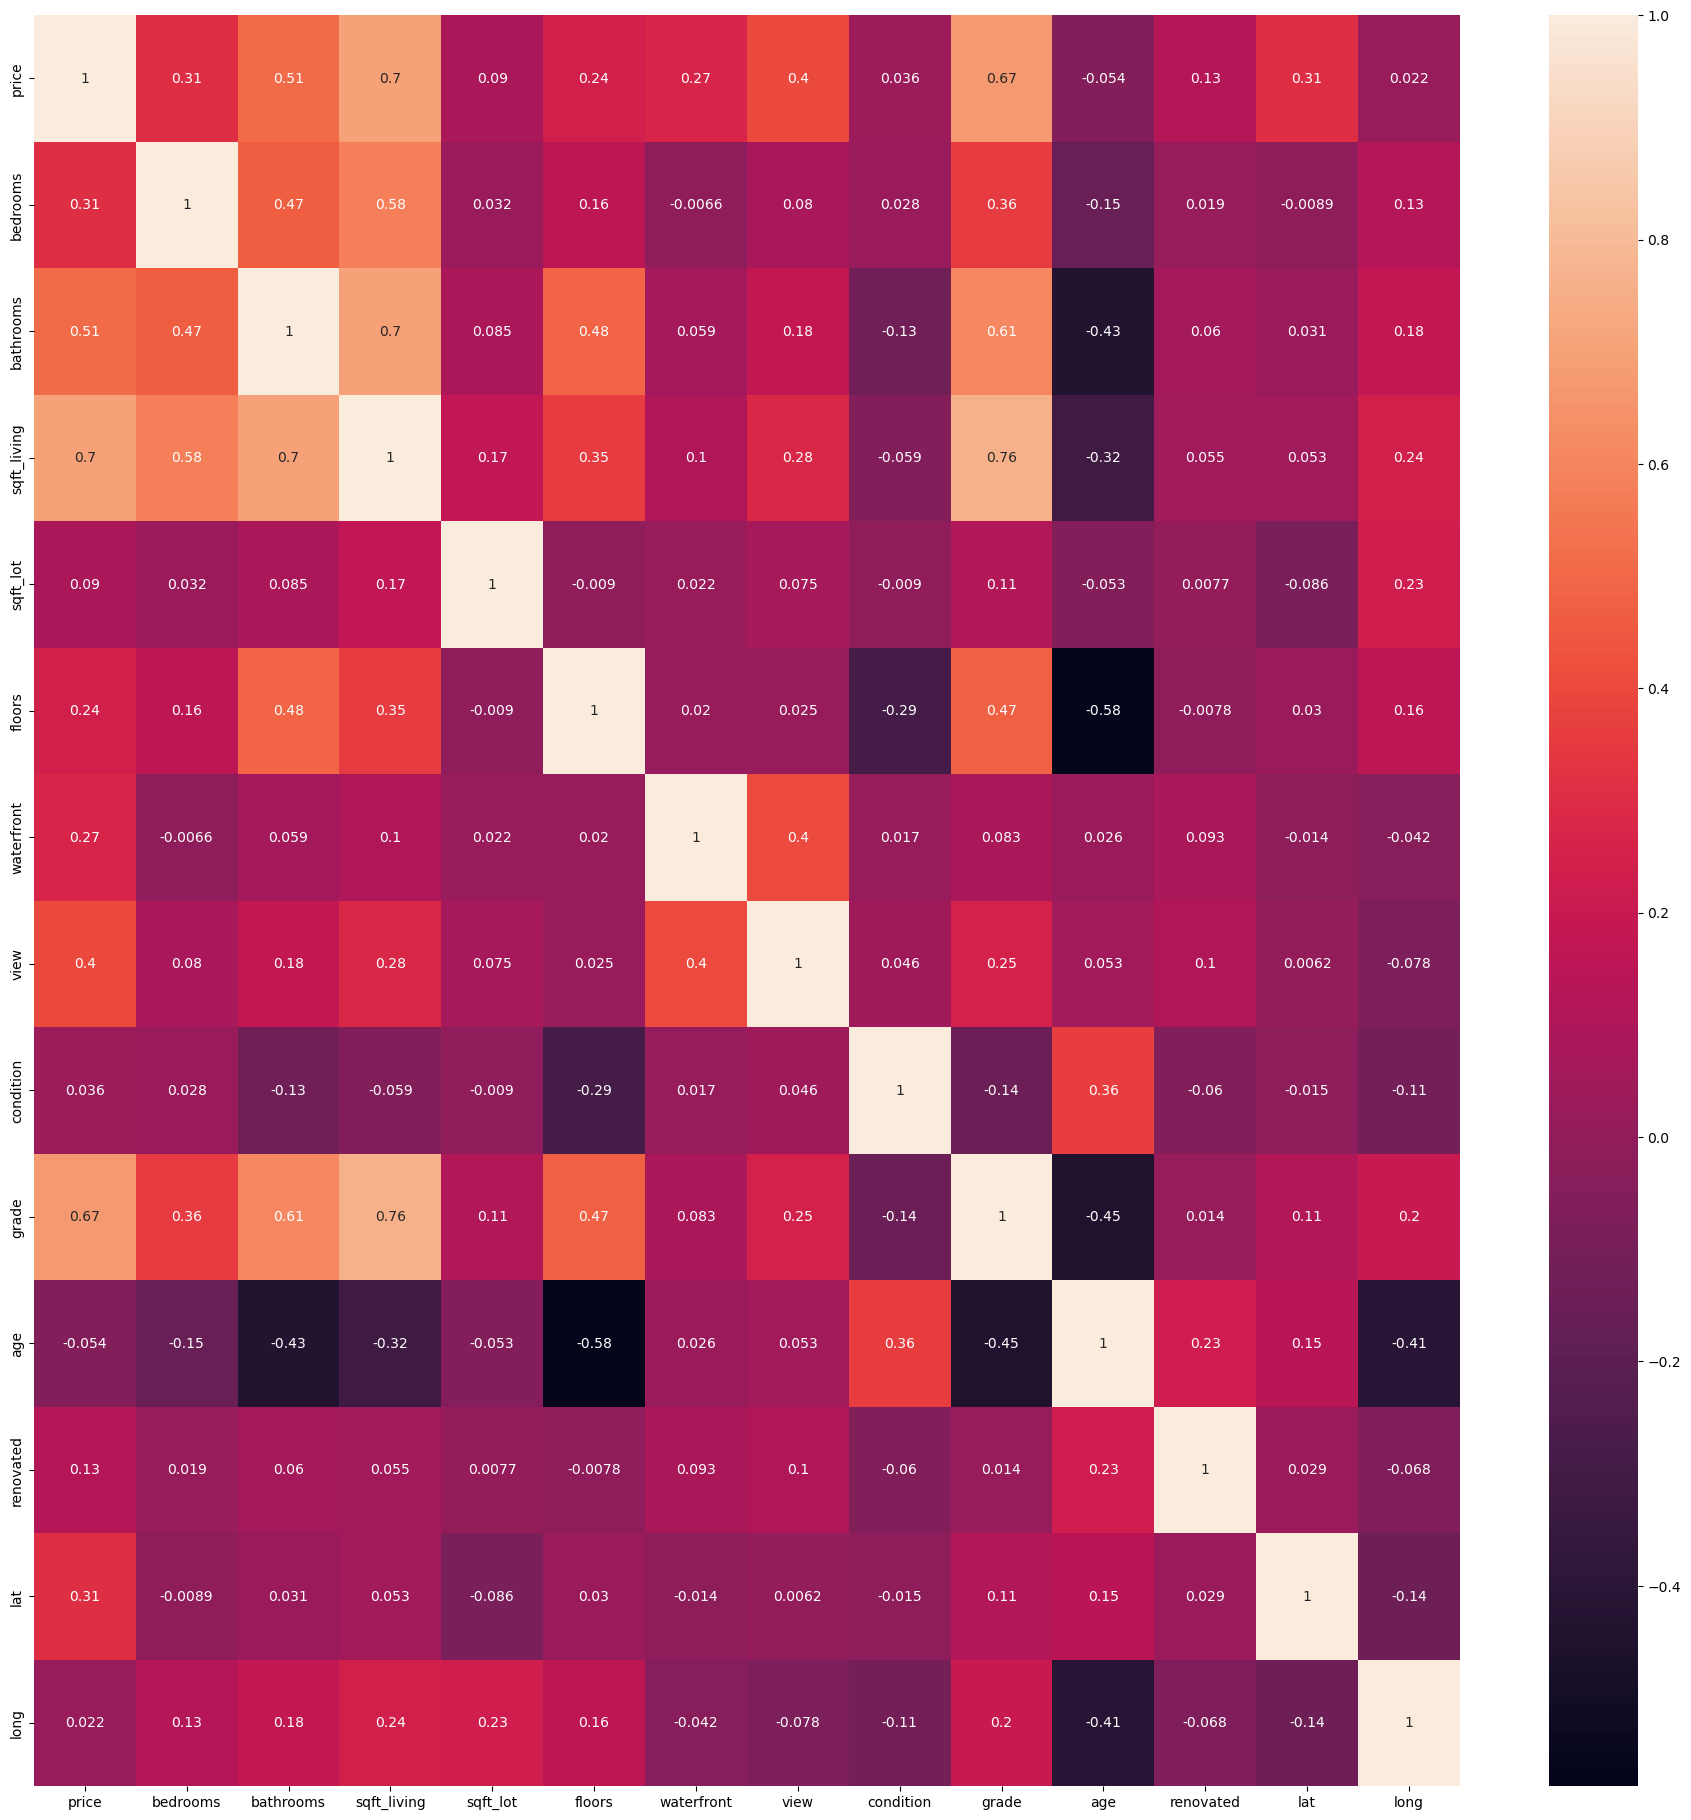

In [97]:
plt.figure(figsize=(23,23))
sns.heatmap(data.corr(),annot=True)
plt.show()

### Visualizing the coorelation with price

<Axes: >

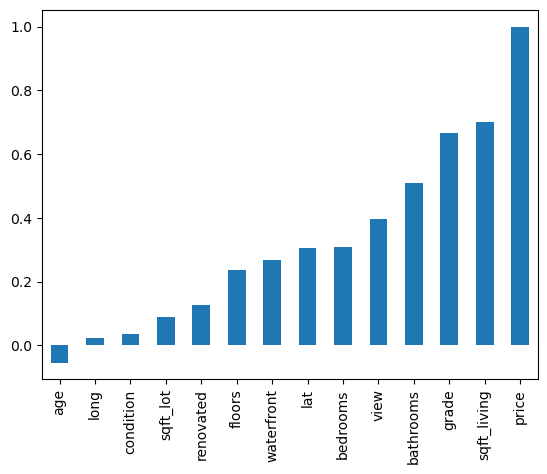

In [98]:
data.corr()['price'].sort_values().plot(kind='bar')

### Visualizing the relation between price and sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15, age, renovated, bedrooms, bathrooms, floors, waterfront, view, condition, grade

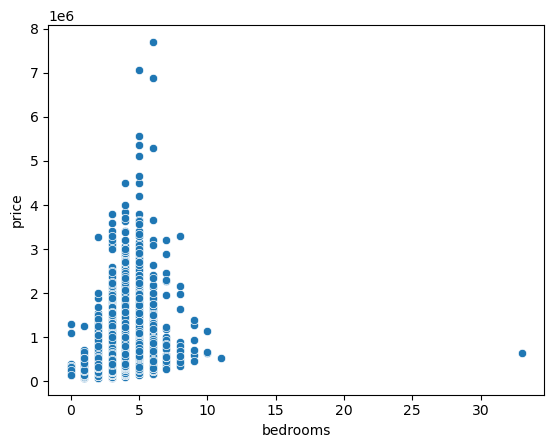

In [99]:
sns.scatterplot( x = data['bedrooms'], y = data['price'])
plt.show()

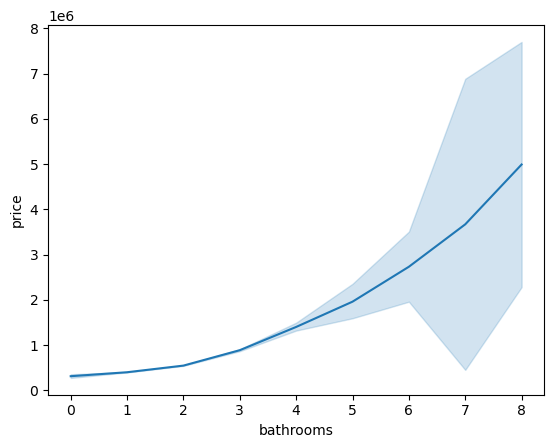

In [100]:
sns.lineplot( x = data['bathrooms'], y = data['price'])
plt.show()

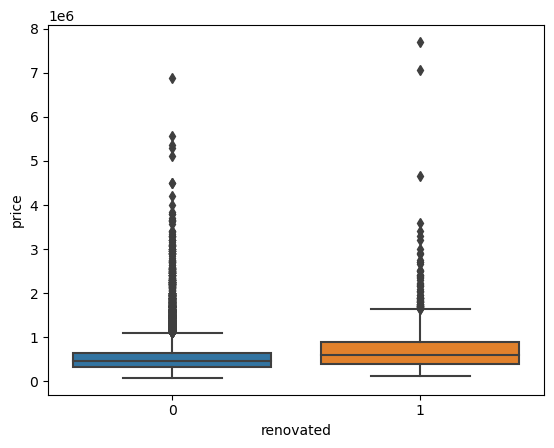

In [101]:
sns.boxplot( x = data['renovated'], y = data['price'])
plt.show()

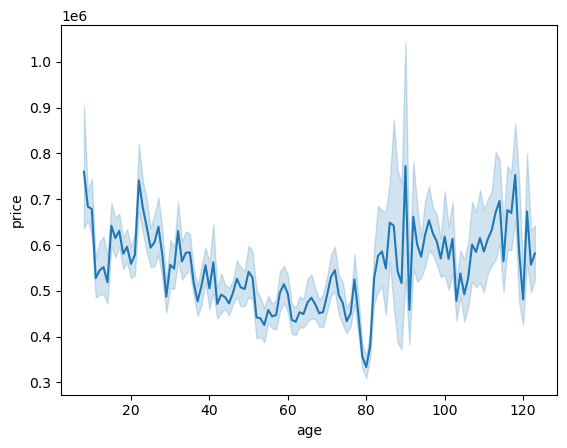

In [102]:
sns.lineplot( x = data['age'], y = data['price'])
plt.show()

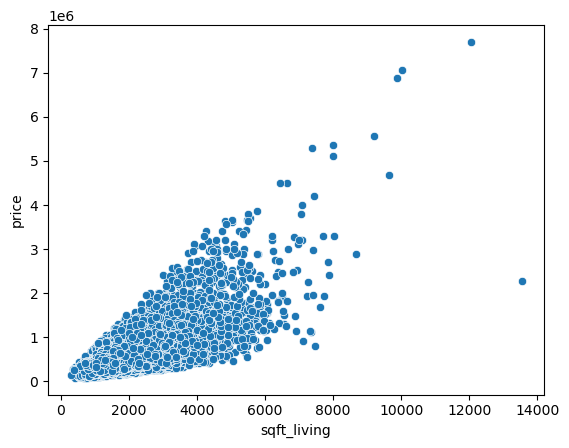

In [103]:
sns.scatterplot( x = data['sqft_living'], y = data['price'])
plt.show()

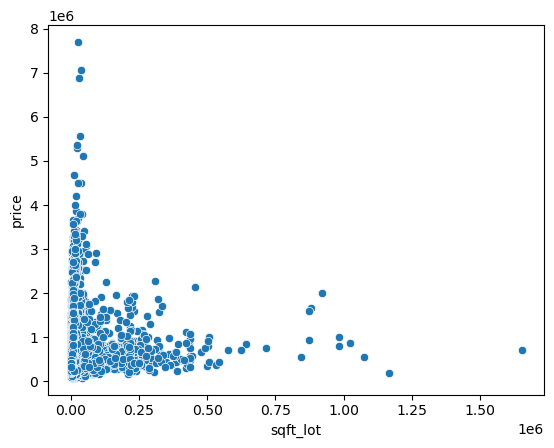

In [104]:
sns.scatterplot( x = data['sqft_lot'], y = data['price'])
plt.show()

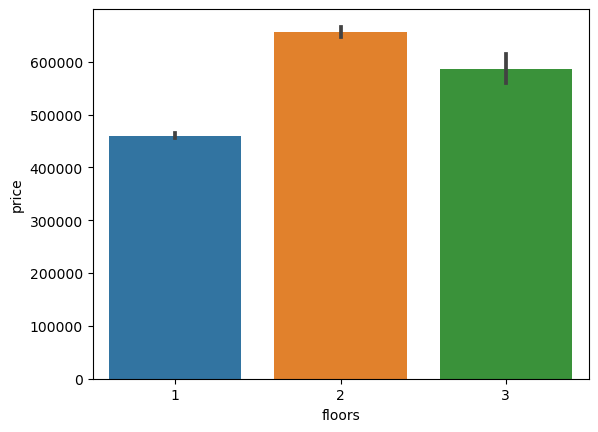

In [105]:
sns.barplot( x = data['floors'], y = data['price'])
plt.show()

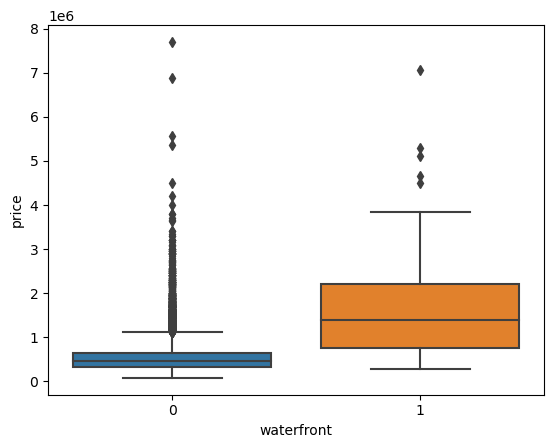

In [106]:
sns.boxplot( x = data['waterfront'], y = data['price'])
plt.show()

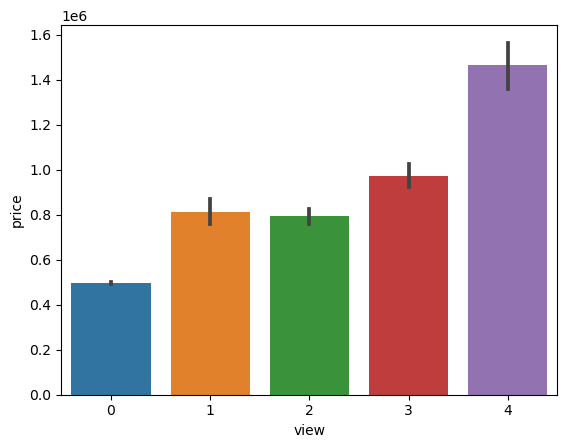

In [107]:
sns.barplot( x = data['view'], y = data['price'])
plt.show()

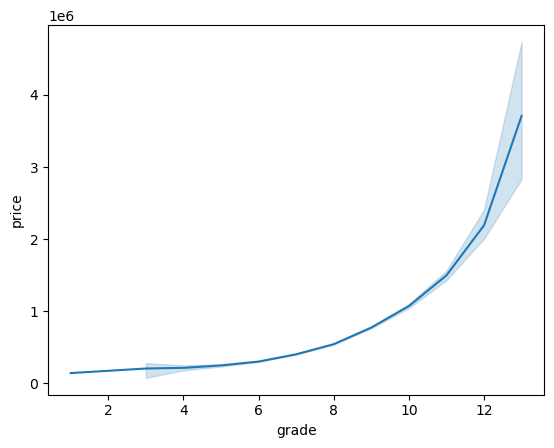

In [108]:
sns.lineplot( x = data['grade'], y = data['price'])
plt.show()

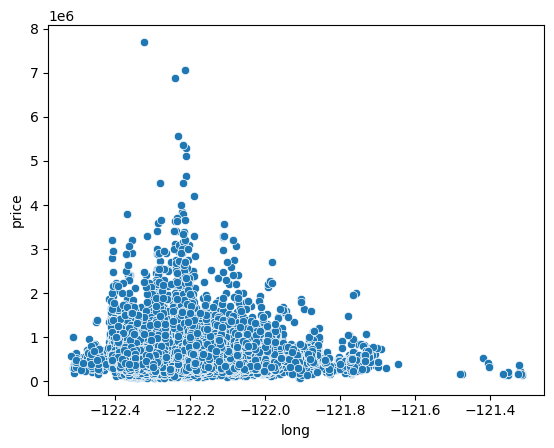

In [109]:
sns.scatterplot( x = data['long'], y = data['price'])
plt.show()

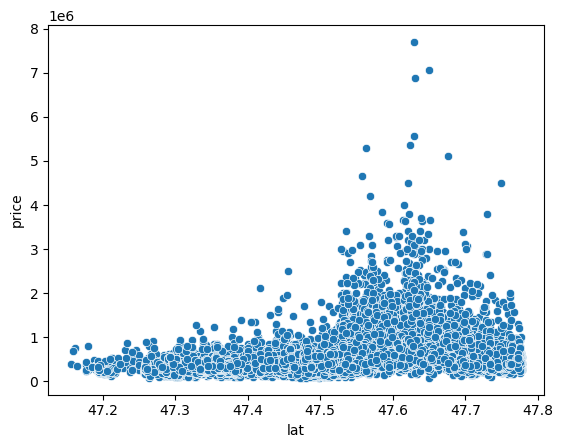

In [110]:
sns.scatterplot( x = data['lat'], y = data['price'])
plt.show()

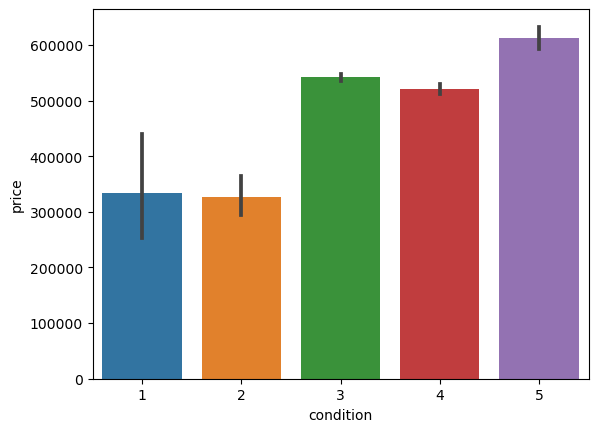

In [111]:
sns.barplot( x = data['condition'], y = data['price'])
plt.show()

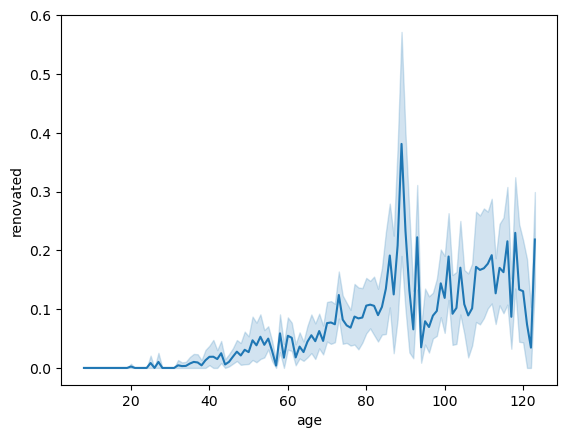

In [112]:
sns.lineplot( x = data['age'], y = data['renovated'])
plt.show()

### Plotting the location of the houses based on longitude and latitude on the map

In [113]:
# adding a new column price_range and categorizing the price into 4 categories
price_range = pd.cut(data['price'],bins=[0,321950,450000,645000,1295648],labels=['Low','Medium','High','Very High'])
map = folium.Map(location=[47.560053,-122.213896],zoom_start=5)
marker_cluster = FastMarkerCluster(data[['lat', 'long']].values.tolist()).add_to(map)
map

# Train/Test Split

In [114]:
x = data.drop(['price'],axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(x , y,test_size=0.3,random_state=10)


## Model Training

### Using pipeline to combine the transformers and LinearRegression

In [115]:
input = [('scale',StandardScaler()),('polynomial', PolynomialFeatures(degree=2)),('model',LinearRegression())]
pipe = Pipeline(input)

pipe.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [116]:
#testing the model

pipe_pred = pipe.predict(X_test)
r2_score(y_test,pipe_pred)

0.7969876829596808

## Ridge Regression

In [117]:
Ridgemodel = Ridge(alpha = 0.001)
Ridgemodel.fit(X_train,y_train)

Ridge(alpha=0.001)

In [118]:
#testing the model

r_pred = Ridgemodel.predict(X_test)
r2_score(y_test,r_pred)

0.7060210713852579

## Random Forest Regression

In [119]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)

regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [120]:
#testing the model

yhat = regressor.predict(X_test)
r2_score(y_test,yhat)

0.8823116444397497

## Model Evalution

### Distribution plot from the models predictions and the actual values

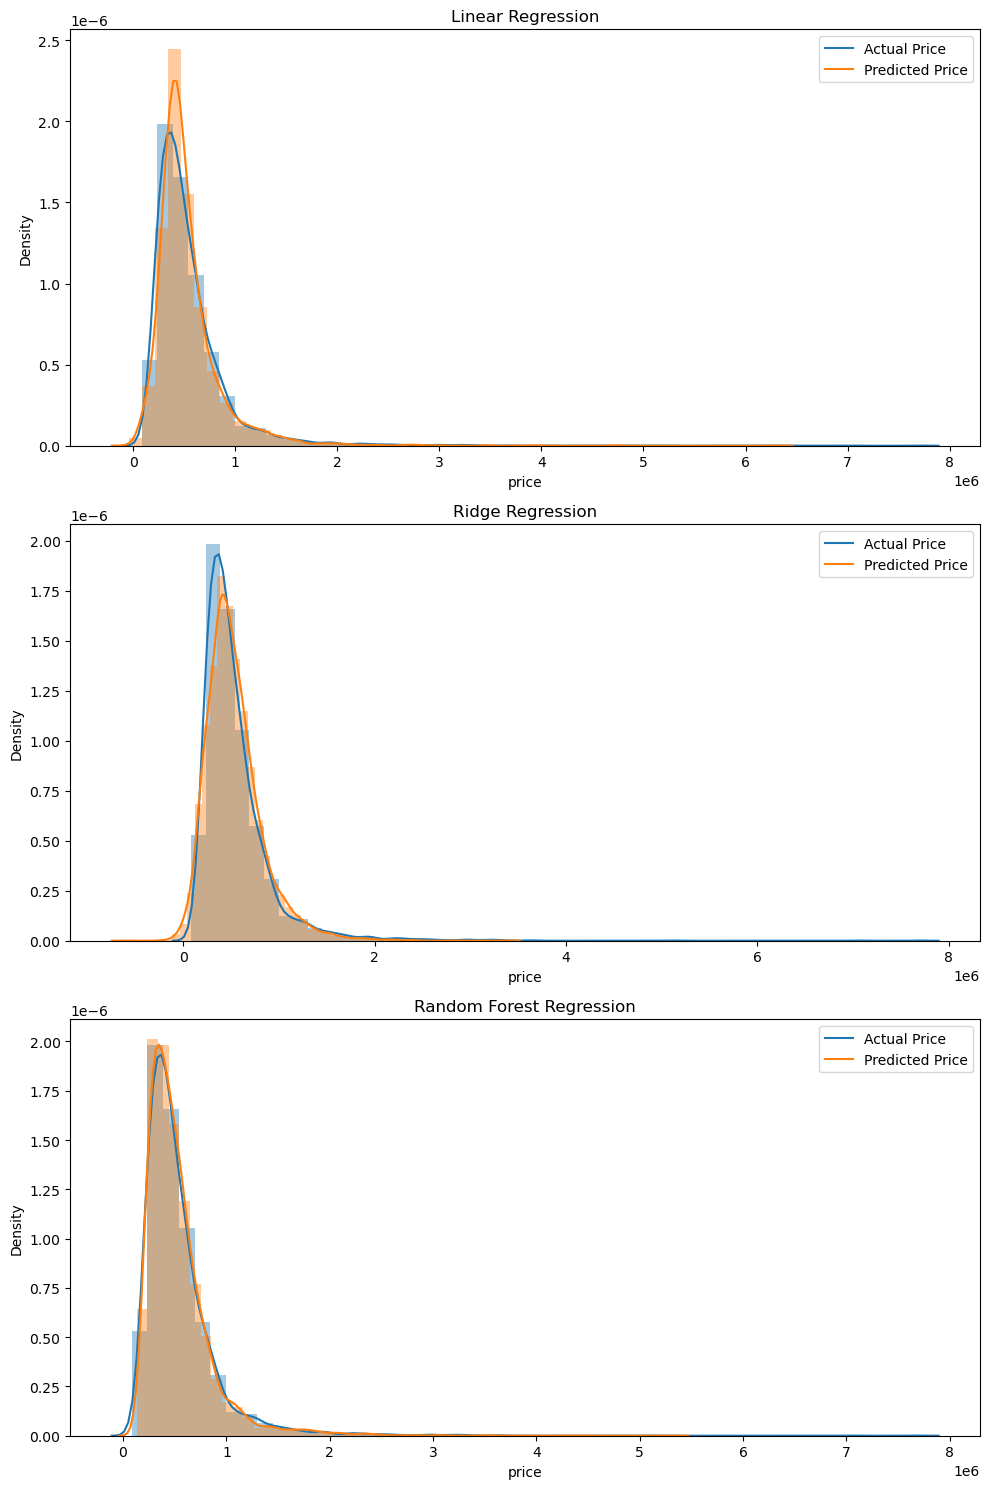

In [121]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Plot for Linear Regression
sns.distplot(y_test, ax=ax[0])
sns.distplot(pipe_pred, ax=ax[0])
ax[0].legend(['Actual Price', 'Predicted Price'])
ax[0].set_title('Linear Regression')

# Plot for Ridge Regression
sns.distplot(y_test, ax=ax[1])
sns.distplot(r_pred, ax=ax[1])
ax[1].legend(['Actual Price', 'Predicted Price'])
ax[1].set_title('Ridge Regression')

# Plot for Random Forest Regression
sns.distplot(y_test, ax=ax[2])
sns.distplot(yhat, ax=ax[2])
ax[2].legend(['Actual Price', 'Predicted Price'])
ax[2].set_title('Random Forest Regression')

plt.tight_layout()
plt.show()


### Error Evaluation

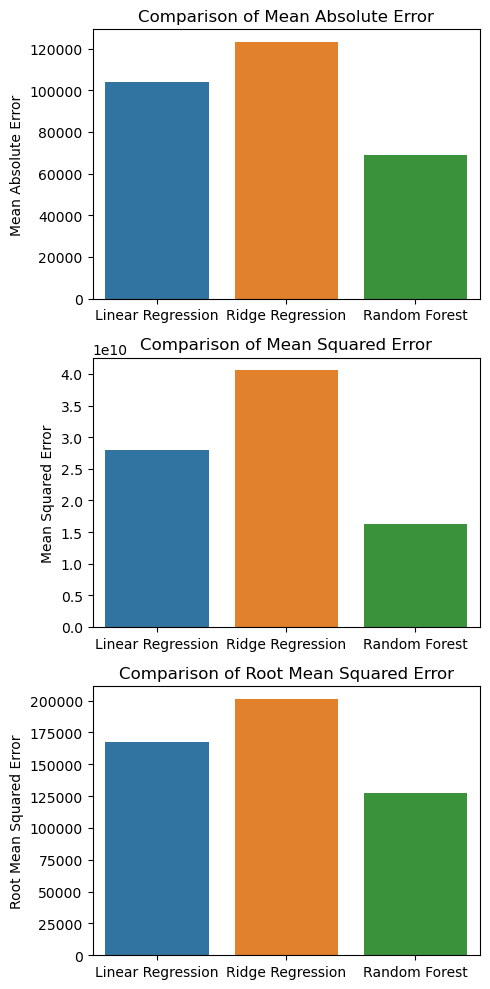

In [122]:

# Create figure and axes
fig, ax = plt.subplots(3, 1, figsize=(5, 10))

# Plot Mean Absolute Error
sns.barplot(x=['Linear Regression', 'Ridge Regression', 'Random Forest'],
            y=[mean_absolute_error(y_test, pipe_pred),
               mean_absolute_error(y_test, r_pred),
               mean_absolute_error(y_test, yhat)],
            ax=ax[0])
ax[0].set_ylabel('Mean Absolute Error')
ax[0].set_title('Comparison of Mean Absolute Error')

# Plot Mean Squared Error
sns.barplot(x=['Linear Regression', 'Ridge Regression', 'Random Forest'],
            y=[mean_squared_error(y_test, pipe_pred),
               mean_squared_error(y_test, r_pred),
               mean_squared_error(y_test, yhat)],
            ax=ax[1])
ax[1].set_ylabel('Mean Squared Error')
ax[1].set_title('Comparison of Mean Squared Error')

# Plot Root Mean Squared Error
sns.barplot(x=['Linear Regression', 'Ridge Regression', 'Random Forest'],
            y=[np.sqrt(mean_squared_error(y_test, pipe_pred)),
               np.sqrt(mean_squared_error(y_test, r_pred)),
               np.sqrt(mean_squared_error(y_test, yhat))],
            ax=ax[2])
ax[2].set_ylabel('Root Mean Squared Error')
ax[2].set_title('Comparison of Root Mean Squared Error')

plt.tight_layout()
plt.show()


### Accuracy Evaluation

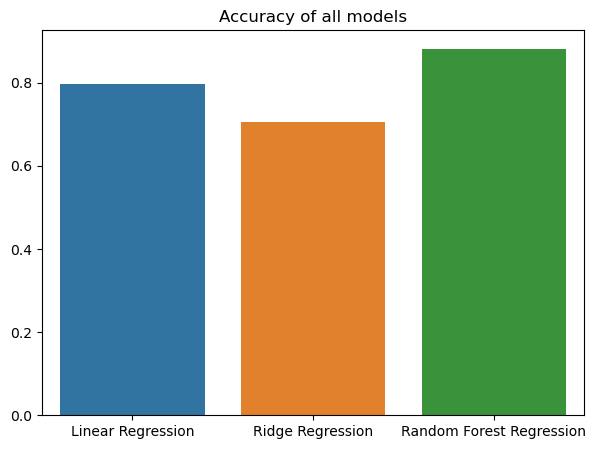

In [123]:
# plot accuracy of all models in the same graph
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest Regression'],y=[metrics.r2_score(y_test,pipe_pred),metrics.r2_score(y_test,r_pred),metrics.r2_score(y_test,yhat)])
ax.set_title('Accuracy of all models')
plt.show()

## Predicting the price of a new house

In [124]:
# #input the values

# bedrooms = 3
# bathrooms = 2
# sqft_living = 2000
# sqft_lot = 10000
# floors = 2
# waterfront = 0
# view = 0
# condition = 3
# grade = 8
# yr_built = 1990
# yr_renovated = 0
# lat = 47.5480
# long = -121.9836


In [125]:
# #predicting the price using random forest regression
# price = regressor.predict([[bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long]])
# print('The price of the house is $',price[0])

In [128]:
import pandas as pd
from dash import html, dcc, Input, Output, State, Dash

# Initialize the Dash app
app = Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.Div([
        html.H1("House Price Prediction", style={'text-align': 'center'}),
        
        html.Div([
            dcc.Input(id='bedrooms', type='number', placeholder='Bedrooms',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='bathrooms', type='number', placeholder='Bathrooms',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='sqft_living', type='number', placeholder='Sqft_living',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='sqft_lot', type='number', placeholder='Sqft_lot',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='floors', type='number', placeholder='Floors',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='waterfront', type='number', placeholder='Waterfront',
                      style={'margin': '10px', 'padding': '10px'}),            
            dcc.Input(id='view', type='number', placeholder='View',
                      style={'margin': '10px', 'padding': '10px'}),            
            dcc.Input(id='condition', type='number', placeholder='Condition',
                      style={'margin': '10px', 'padding': '10px'}),            
            dcc.Input(id='grade', type='number', placeholder='Grade',
                      style={'margin': '10px', 'padding': '10px'}),            
            dcc.Input(id='age', type='number', placeholder='Age',
                      style={'margin': '10px', 'padding': '10px'}),            
            dcc.Input(id='renovated', type='number', placeholder='Renovated',
                      style={'margin': '10px', 'padding': '10px'}),            
            dcc.Input(id='lat', type='number', placeholder='Lat',
                      style={'margin': '10px', 'padding': '10px'}),            
            dcc.Input(id='long', type='number', placeholder='Long',
                      style={'margin': '10px', 'padding': '10px'}),
            html.Button('Predict Price', id='predict_button',
                        style={'margin': '10px', 'padding': '10px', 'background-color': '#007BFF', 'color': 'white'}),
        ], style={'text-align': 'center'}),
        
        html.Div(id='prediction_output', style={'text-align': 'center', 'font-size': '20px', 'margin-top': '20px'})
    ], style={'width': '50%', 'margin': '0 auto', 'border': '2px solid #007BFF', 'padding': '20px', 'border-radius': '10px'})
])

# Define callback to update output
@app.callback(
    Output('prediction_output', 'children'),
    [Input('predict_button', 'n_clicks')],
    [State('bedrooms', 'value'), 
     State('bathrooms', 'value'),
     State('sqft_living', 'value'), 
     State('sqft_lot', 'value'),
     State('floors', 'value'), 
     State('waterfront', 'value'),
     State('view', 'value'),
     State('condition', 'value'),
     State('grade', 'value'),
     State('age', 'value'),
     State('renovated', 'value'),
     State('lat', 'value'),
     State('long', 'value')]
)
def update_output(n_clicks, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view,
                  condition, grade, age, renovated, lat, long):
    if n_clicks is not None and n_clicks > 0 and all(v is not None for v in [bedrooms, bathrooms, sqft_living, sqft_lot,
                                                     floors, waterfront, view, condition,
                                                     grade, age, renovated, lat, long]):
        # Prepare the feature vector
        features = pd.DataFrame([[bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, 
                                  view, condition, grade, age, renovated, lat, long]], 
                                columns=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                                         'floors', 'waterfront', 'view', 'condition', 'grade',
                                         'age', 'renovated', 'lat', 'long'])
        # Predict
        prediction = regressor.predict(features)[0]
        return f'Predicted House Price: ${prediction:.2f}'
    elif n_clicks is not None and n_clicks > 0:
        return 'Please enter all values to get a prediction'
    return ''

# Run the app
if __name__ == '__main__':
    app.run_server(port=8051)


In [ ]:
data